# Predicting Cancer using Genetics

---
embed-resources: true
---

## Introduction

Today, I will make a model where it will predict a type of cancer based on tissue samples. This model only works for this dataset and not for public use.

## Methods

In [15]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

### Data

In [16]:
# load data
genetics_train = pd.read_parquet(
    "https://cs307.org/lab/data/genetics-train.parquet",
)
genetics_test = pd.read_parquet(
    "https://cs307.org/lab/data/genetics-test.parquet",
)
genetics_train

,cancer,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_1990,gene_1991,gene_1992,gene_1993,gene_1994,gene_1995,gene_1996,gene_1997,gene_1998,gene_1999
663,BRCA,0.0,3.149861,1.913454,5.562355,9.638586,0.0,4.302421,0.511670,0.000000,...,7.300691,8.383307,1.187198,0.000000,7.350471,0.0,4.634587,7.082415,9.727447,1.187198
148,LUAD,0.0,6.237034,5.043235,6.297397,10.391415,0.0,7.669941,0.913033,0.000000,...,6.322446,7.815595,13.809095,0.913033,7.651052,0.0,7.476074,4.733739,8.510863,0.000000
347,BRCA,0.0,3.856896,2.394981,6.758277,9.585513,0.0,7.409009,1.242023,0.000000,...,6.845515,9.194823,5.667696,0.000000,7.748253,0.0,5.567421,5.203158,7.364879,0.000000
496,PRAD,0.0,4.279924,3.606963,5.706613,9.716581,0.0,8.244226,0.402613,0.000000,...,6.598611,8.199118,5.024218,0.000000,7.607907,0.0,5.705281,6.278007,9.725383,0.000000
360,BRCA,0.0,3.359788,4.199986,6.144766,9.141834,0.0,9.014135,1.061776,0.626486,...,7.062651,9.670708,4.243707,0.000000,8.156811,0.0,7.363487,5.384844,8.703443,1.894876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,KIRC,0.0,3.069737,3.623200,6.744955,9.591219,0.0,7.254254,0.000000,0.000000,...,7.333665,8.365334,5.481444,0.000000,7.307674,0.0,5.723447,5.401791,9.067881,0.000000
421,BRCA,0.0,3.534497,3.064866,6.638882,10.010206,0.0,7.899387,0.000000,0.000000,...,7.080615,9.968912,10.501041,0.000000,8.866052,0.0,5.276806,4.941073,8.548240,0.000000
677,BRCA,0.0,4.087463,3.786596,6.385845,9.544964,0.0,8.062856,0.000000,0.000000,...,5.842979,9.931033,10.234817,0.000000,8.384568,0.0,7.033423,5.749534,8.132371,0.000000
697,LUAD,0.0,3.272889,4.529234,7.134909,9.504362,0.0,5.668893,0.000000,0.000000,...,7.300966,8.040350,11.972872,0.000000,7.592607,0.0,5.026256,6.137704,8.780947,1.167936


From the train data above, each row shows a type of cancer and its gene information correlated with it. The variables in the data set are:

### Response 

**`cancer`**

- [object] the clinically determined cancer type, one of:
- BRCA: Breast Invasive Carcinoma
- PRAD: Prostate Adenocarcinoma
- KIRC: Kidney Renal Clear Cell Carcinoma
- LUAD: Lung Adenocarcinoma
- COAD: Colon Adenocarcinoma


### Features

**`gene_####`**

- [float64] gene expression (for gene number #### in the dataset) quantification as measured by an Illumina HiSeq platform


For our summary statistics, we have 128 rows of each cancer and its 2000 genetic features

/var/folders/tb/gxmnn8011191kwx1sz61vls40000gq/T/ipykernel_46036/2435712058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette="viridis")


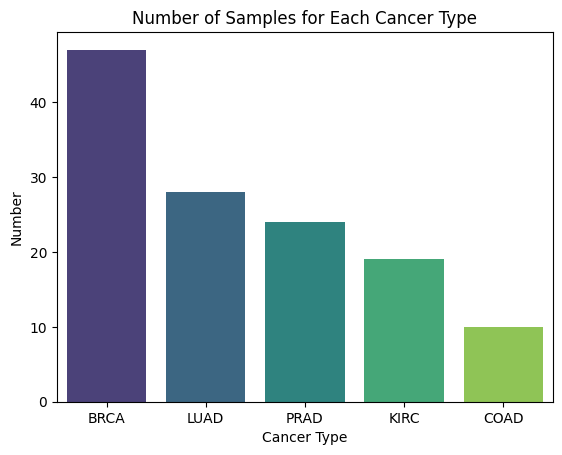

In [17]:
# exploratory visualization
cancer_counts = genetics_train['cancer'].value_counts()
sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette="viridis")
plt.xlabel("Cancer Type")
plt.ylabel("Number")
plt.title("Number of Samples for Each Cancer Type")
plt.show()

The bar plot above lets us visually see how many of each cancer we have in our given dataset. Knowing this could be important for future model making because we can know which type of cancer data we should collect in the future to make better models. For example, we can collect more data on COAD cancer since that is the least type of cancer data we have. 

### Models

In [18]:
# process data for ML
# create X and y for train
X_train = genetics_train.drop(columns=["cancer"])
y_train = genetics_train["cancer"]

# create X and y for test
X_test = genetics_test.drop(columns=["cancer"])
y_test = genetics_test["cancer"]
numeric = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical = X_train.select_dtypes(include=['object', 'category']).columns


We split the data into train and test sets for our model and split the numeric and categorical variables to make pipelines. We make numeric pipelines to scale them to prevent them having too high or too low values or fill in missing data. We onehotencode the categorical values to convert text into numbers for our model.

In [19]:
# train models
numeric_transformer = make_pipeline(
    SimpleImputer(strategy= 'mean'),
    StandardScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy= 'most_frequent'),
    OneHotEncoder(handle_unknown='infrequent_if_exist')
)
preprocessor = make_column_transformer(
    (numeric_transformer, numeric),
    (categorical_transformer, categorical),
    remainder='drop'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [20]:
param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [5, 10]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    refit = True
)
_ = grid_search.fit(X_train, y_train)

After making the transformers and pipeline, we are able to fit our model with the train datasets.

## Results

In [21]:
# report model metrics
y_pred = grid_search.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 1.0


When using our model to predict on the y_test, we are able to achieve a perfect test accuracy score of 1.0

In [22]:
# serialize model
dump(grid_search, 'genetics.joblib')

['genetics.joblib']

## Discussion

Our final model is able to achieve a test accuracy score of 1.0 which means that the model was able to accurately predict the type of cancer 100% of the time.

This sounds astounding that the model has a 100% accuracy and did not make any wrong predictions but we should take a step back and analyze the model more. Having a perfect accuracy score of 1.0 is extremely rare and this can be very suspicious and we want to be cautious especially in the context of identifying cancer types.

When we look at the bar plot below, we can see that the test data has a lot of cases of BRCA cancer and not so much of the others such as COAD cancer. Since BRCA cancer dominates the test set, the model is more likely to accurately predict BRCA cancers but not so much of the other cancer types. Also, the entire dataset is pretty small with only 128 samples. We would need to have thousands of more samples in order to lower suspicion. 

In order to improve this model, we can gather more samples and have a fairly equal number of each cancer types to lower suspicion and let the model learn more patterns in the data. Another thing we can do next time is to decrease the number of splits the model makes since it is possible that with too many trees or splits in the data, the model could've over fit some noise in the data.

The graphs below shows how much of each cancer type there were in the dataset and we see that there are far more BRCA cases than any other cancer types. This is not good because it could lead to false high accuracy. For example, if BRCA is 90% of the test data, the model will always correctly predict BRCA but fail to predict the other types of cancers.

Overall, we should not use this model because the data we used does not have enough samples and the risks involved are too high in the context of predicting cancer types. 

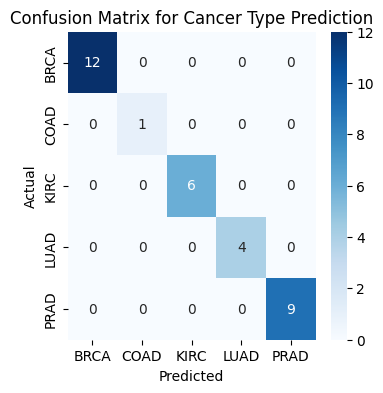

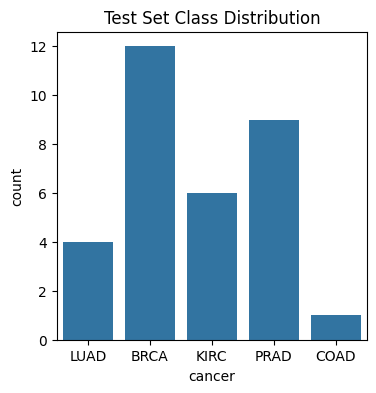

In [23]:
# summary figure
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues', 
            xticklabels=grid_search.classes_, 
            yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Cancer Type Prediction')
plt.show()

plt.figure(figsize=(4, 4))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()